In [1]:
import sys
import os

# include app-wide functions (utils.py)
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('utils.py'))))
from utils import clean_text, persist_model, persist_vectorizer, sample_data

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import pickle 
import random
import string
import json

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# read project data into dataframe
raw_data = []
with open('./data/cyber_data.json') as f:
    for line in f:
        raw_data.append(json.loads(line))

labels = [int(d['annotation']['label'][0]) for d in raw_data]
text = [d['content'] for d in raw_data]

data = {'text': text, 
        'label': labels }
raw_df = pd.DataFrame(data, columns=['text', 'label'])  # raw data frame

df = raw_df.copy()  # cleaned dataframe
df.text = df.text.apply(clean_text)

//anaconda/lib/python3.5/site-packages/bs4/__init__.py:336: UserWarning: "http://tinyurl.com/these-hats-are-damn-tradition" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
//anaconda/lib/python3.5/site-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
//anaconda/lib/python3.5/site-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
//anaconda/lib/python3.5/site-packages/bs4/__init__.py:336: UserWarning: "http://www.e-castig.com/index.php?r=C1o6s" looks like a URL. Beautiful Soup is not an HTTP client. You shou

In [3]:
# some sample raw data
sample_data(raw_df, n=3)

Label: 0
Index: 5661	--- you may be working from the same book as me; I'm confiting pork bellies (and then a cryovac'd tenderloin)  but in pig fat

Label: 0
Index: 5218	its like his fucking twin or something. Iuno it was weird.

Label: 0
Index: 2862	omg omg omg I am SO happy to see you on here! We're gonna have some fucking kickass fun. Fasten your seatbelt pussycat.

Label: 1
Index: 3690	I can guess  smelly slut.

Label: 1
Index: 7230	SWEEET you've just become cooler in my book or as someone said earlier today.. kick ass... so 80's :)

Label: 1
Index: 6633	Welkom ! Dat Apple freak deed me besluiten je maar te volgen :)



In [4]:
# bag of words representation of text data
vectorizer = CountVectorizer()
vectorizer.fit(df.text)

persist_vectorizer(vectorizer, 'test_v.0.0')    

Vectorizer Saved.


In [5]:
# model development
X = vectorizer.fit_transform(df.text) #  bag-of-words representation
X = X.toarray()
y = df.label
print('{} {}'.format('Bag-of-words data shape', X.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print('{:>15s} {}'.format('Train set shape', X_train.shape))
print('{:>15s} {}'.format('Test set shape', X_test.shape))

Bag-of-words data shape (20001, 16673)
Train set shape (16000, 16673)
 Test set shape (4001, 16673)


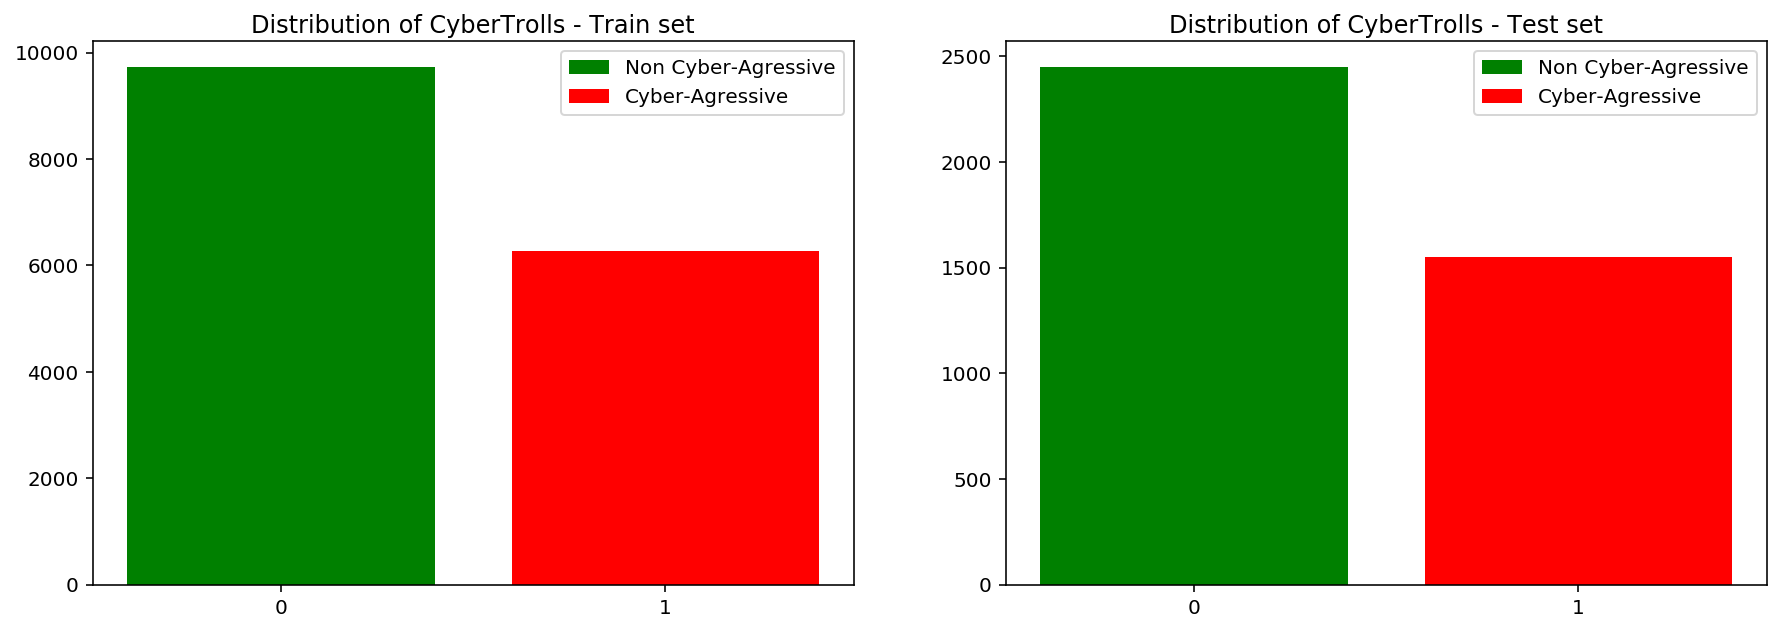

In [6]:
# Show of labels train/test sets
fig, axs = plt.subplots(1, 2, figsize=(15,5))

train_count = Counter(y_train)
axs[0].set_title('Distribution of CyberTrolls - Train set')
axs[0].bar(list(train_count.keys())[0],
           list(train_count.values())[0],
           align='center',
           color='g',
           label='Non Cyber-Agressive')
axs[0].bar(list(train_count.keys())[1],
           list(train_count.values())[1],
           align='center',
           color='r',
           label='Cyber-Agressive')
axs[0].set_xticks(list(set(y_train)))
axs[0].legend()


test_count = Counter(y_test)
axs[1].set_title('Distribution of CyberTrolls - Test set')
axs[1].bar(list(test_count.keys())[0],
           list(test_count.values())[0],
           align='center',
           color='g',
           label='Non Cyber-Agressive')
axs[1].bar(list(test_count.keys())[1],
           list(test_count.values())[1],
           align='center',
           color='r',
           label='Cyber-Agressive')
axs[1].set_xticks(list(set(y_test)))
axs[1].legend()

plt.show()

In [7]:
# TODO: upgrade simple baseline model
# logistic regression model 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix

clf = LogisticRegressionCV(Cs=[100], solver='saga', cv=2, n_jobs=2, verbose=1, max_iter=100)
clf.fit(X_train, y_train)

print('{:>20s} {:.2f}'.format('Train Accuracy:', clf.score(X_train, y_train)))
print('{:>20s} {:.2f}'.format('Test Accuracy:', clf.score(X_test, y_test)))
confusion_matrix(y_test, clf.predict(X_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 141 seconds


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 145 seconds


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  2.5min finished
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


     Train Accuracy: 0.92
      Test Accuracy: 0.80


array([[2003,  446],
       [ 348, 1204]])

In [10]:
persist_model(clf, 'test_v.0.0')

Model Saved.
